In [7]:
data_yaml = """
train: /content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO/train/images
val: /content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO/valid/images
test: /content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO/test/images

nc: 9
names: ['Apple', 'Banana', 'Grapes', 'Kiwi', 'Mango', 'Orange', 'Pineapple', 'Sugerapple', 'Watermelon']
"""

with open("/content/drive/MyDrive/Fruits-YOLO/data.yaml", "w") as f:
    f.write(data_yaml)
print("✅ data.yaml updated successfully!")


✅ data.yaml updated successfully!


In [3]:
import os

deepest_path = '/content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO'

print(f"Checking contents of: {deepest_path}")
if os.path.exists(deepest_path):
    contents = os.listdir(deepest_path)
    print("📁 Contents:", contents)

    # Check for common validation folder names
    if 'valid' in contents:
        print("✅ Found 'valid' folder")
        print("   Inside 'valid':", os.listdir(os.path.join(deepest_path, 'valid')))
    elif 'val' in contents:
        print("⚠️ Found 'val' instead of 'valid'. We need to update data.yaml.")
    else:
        print("❌ No 'valid' or 'val' folder found here!")
else:
    print("❌ path does not exist.")

Checking contents of: /content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO
📁 Contents: ['train', 'test', 'valid', 'data.yaml', 'train.cache']
✅ Found 'valid' folder
   Inside 'valid': ['_classes.csv', 'download-9-_jpeg.rf.ac086ac2b231135d97ce4c28ce1c4c84.jpg', 'Apple', 'Banana', 'Grapes', 'Kiwi', 'Mango', 'Orange', 'Pineapple', 'Sugerapple', 'Watermelon']


In [4]:
import os
import glob

# Path currently being used for training
TRAIN_PATH = '/content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO/train'

print(f"🕵️ Searching for labels in: {TRAIN_PATH}\n")

# 1. Check for standard YOLO .txt labels mixed with images
txt_files = glob.glob(os.path.join(TRAIN_PATH, '*.txt'))
img_files = glob.glob(os.path.join(TRAIN_PATH, '*.jpg')) + glob.glob(os.path.join(TRAIN_PATH, '*.jpeg'))

print(f"Found {len(img_files)} images.")
print(f"Found {len(txt_files)} .txt files directly in train folder.")

# 2. Check if there is a 'labels' subfolder
labels_subfolder = os.path.join(TRAIN_PATH, 'labels')
if os.path.isdir(labels_subfolder):
    sub_txts = glob.glob(os.path.join(labels_subfolder, '*.txt'))
    print(f"Found 'labels' subfolder with {len(sub_txts)} .txt files.")
else:
    print("No 'labels' subfolder found.")

# 3. Check for other common annotation formats (CSV, JSON, XML)
print(f"Found {len(glob.glob(os.path.join(TRAIN_PATH, '*.csv')))} .csv files.")
print(f"Found {len(glob.glob(os.path.join(TRAIN_PATH, '*.json')))} .json files.")
print(f"Found {len(glob.glob(os.path.join(TRAIN_PATH, '*.xml')))} .xml files.")

🕵️ Searching for labels in: /content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO/train

Found 6 images.
Found 0 .txt files directly in train folder.
No 'labels' subfolder found.
Found 1 .csv files.
Found 0 .json files.
Found 0 .xml files.


In [5]:
import glob
import os
import pandas as pd

TRAIN_PATH = '/content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO/train'
csv_files = glob.glob(os.path.join(TRAIN_PATH, '*.csv'))

if csv_files:
    csv_path = csv_files[0]
    print(f"📄 Found CSV: {os.path.basename(csv_path)}")
    try:
        df = pd.read_csv(csv_path)
        print("\n🔍 First 5 rows of data:")
        print(df.head())
        print("\n📋 Column names:", df.columns.tolist())
    except Exception as e:
        print(f"❌ Error reading CSV: {e}")
else:
    print("❌ Weird... diagnostic said there was a CSV, but now I can't find it.")

📄 Found CSV: _classes.csv

🔍 First 5 rows of data:
                                            filename   Apple   Banana  \
0  Image_83_jpg.rf.a8f265b8df3540d51f58d248f193f7...       0        0   
1  images-2023-02-07T155811-656_jpeg.rf.a9b9be4c2...       0        0   
2  Image_51_jpg.rf.a93e4010657a33cac9925c7c737aac...       0        0   
3  images-2023-02-07T160736-941_jpeg.rf.a896b4e19...       1        0   
4  images-2023-02-07T161801-786_jpeg.rf.a9b221e69...       0        0   

    Grapes   Kiwi   Mango   Orange   Pineapple   Sugerapple   Watermelon  
0        0      1       0        0           0            0            0  
1        0      0       0        0           0            0            1  
2        0      1       0        0           0            0            0  
3        0      0       0        0           0            0            0  
4        0      0       0        0           0            1            0  

📋 Column names: ['filename', ' Apple', ' Banana', ' Grapes'

In [6]:
import os
import pandas as pd
import shutil
from tqdm.notebook import tqdm

BASE_PATH = '/content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO'

def reorganize_split(split_name):
    split_dir = os.path.join(BASE_PATH, split_name)
    csv_path = os.path.join(split_dir, '_classes.csv')

    if not os.path.exists(csv_path):
        print(f"⚠️ No CSV found for {split_name}, skipping.")
        return

    print(f"🔄 Processing {split_name}...")
    df = pd.read_csv(csv_path)
    # Clean up column names (remove spaces)
    df.columns = [c.strip() for c in df.columns]
    class_cols = [c for c in df.columns if c != 'filename']

    # Create class subfolders
    for cls in class_cols:
        os.makedirs(os.path.join(split_dir, cls), exist_ok=True)

    # Move files
    for _, row in tqdm(df.iterrows(), total=len(df)):
        fname = row['filename']
        src = os.path.join(split_dir, fname)

        # Find which class this image belongs to (where value is 1)
        for cls in class_cols:
            if row[cls] == 1:
                dst = os.path.join(split_dir, cls, fname)
                # Only move if file exists and hasn't been moved yet
                if os.path.exists(src):
                    shutil.move(src, dst)
                break
    print(f"✅ {split_name} reorganized!")

# Reorganize all three splits
reorganize_split('train')
reorganize_split('valid')
reorganize_split('test')

🔄 Processing train...


  0%|          | 0/2697 [00:00<?, ?it/s]

✅ train reorganized!
🔄 Processing valid...


  0%|          | 0/187 [00:00<?, ?it/s]

✅ valid reorganized!
🔄 Processing test...


  0%|          | 0/90 [00:00<?, ?it/s]

✅ test reorganized!


In [8]:
# Ensure we are in the yolov5 folder
%cd /content/yolov5

# Train Classification Model
!python classify/train.py \
  --model yolov5s-cls.pt \
  --data "{BASE_PATH}" \
  --epochs 10 \
  --img 224 \
  --batch 32 \
  --project fruits_cls_run \
  --name yolov5s_fruits_cls

[Errno 2] No such file or directory: '/content/yolov5'
/content
python3: can't open file '/content/classify/train.py': [Errno 2] No such file or directory


In [11]:
import os

BASE_PATH = '/content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO'

print("🧹 Scanning for empty folders that cause errors...\n")

for split in ['train', 'valid', 'test']:
    split_dir = os.path.join(BASE_PATH, split)
    if not os.path.exists(split_dir):
        continue

    # Look at every folder inside train/valid/test
    for cls_name in os.listdir(split_dir):
        cls_path = os.path.join(split_dir, cls_name)

        # If it's a folder, check if it's empty
        if os.path.isdir(cls_path):
            num_files = len([f for f in os.listdir(cls_path) if not f.startswith('.')])
            if num_files == 0:
                print(f"🗑️ DELETING empty folder: {cls_path}")
                os.rmdir(cls_path)
            else:
                # Uncomment the next line if you want to see healthy folder counts
                # print(f"✅ {split}/{cls_name}: {num_files} images")
                pass

print("\n✨ Cleanup complete! Try training again.")

🧹 Scanning for empty folders that cause errors...

🗑️ DELETING empty folder: /content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO/test/Sugerapple

✨ Cleanup complete! Try training again.


In [14]:
import os
import shutil
import datetime

# --- Configurations ---
# 1. Train locally for MAXIMUM SPEED
LOCAL_PROJECT = '/content/yolov5/runs/train_cls'
EXP_NAME = 'yolov5s_fruits_cls'

# 2. Define final destination on Google Drive
DRIVE_PROJECT = '/content/drive/MyDrive/Fruits-YOLO/training_results'
# ----------------------

# Ensure we are in the yolov5 directory
if os.getcwd() != '/content/yolov5':
    if os.path.exists('/content/yolov5'):
        %cd /content/yolov5
    else:
        # Fallback if runtime restarted completely
        %cd /content
        !git clone https://github.com/ultralytics/yolov5.git
        %cd yolov5
        !pip install -r requirements.txt

print("🏎️ Starting FAST local training...")
!python classify/train.py \
  --model yolov5s-cls.pt \
  --data "/content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO" \
  --epochs 10 \
  --img 224 \
  --batch 32 \
  --project "{LOCAL_PROJECT}" \
  --name "{EXP_NAME}" \
  --exist-ok

# --- Automatic Backup ---
print("\n✅ Training finished! Moving results to Google Drive...")

# Define source (local) and destination (drive) paths
source_dir = os.path.join(LOCAL_PROJECT, EXP_NAME)
dest_dir = os.path.join(DRIVE_PROJECT, f"{EXP_NAME}_{datetime.datetime.now().strftime('%Y%m%d_%H%M')}")

# Copy the entire experiment folder to Drive
try:
    shutil.copytree(source_dir, dest_dir)
    print(f"💾 Success! Results saved safely to: {dest_dir}")
except Exception as e:
    print(f"❌ Error copying to Drive: {e}")
    print(f"⚠️ URGENT: Manually download the folder '{source_dir}' before the runtime closes!")

🏎️ Starting FAST local training...
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-11-07 13:28:52.017152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762522132.037112   10760 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762522132.043135   10760 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762522132.058485   10760 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762522132.058509   10760 computation_placer.cc:177] c

/content/yolov5
🧪 Testing image: Image_51_jpg.rf.ba61aec6e1d8d9c3127db88f4c5b7210.jpg
💾 Using weights from Drive: weights/best.pt
classify/predict: weights=['/content/drive/MyDrive/Fruits-YOLO/training_results/yolov5s_fruits_cls_20251107_1353/weights/best.pt'], source=/content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO/test/Orange/Image_51_jpg.rf.ba61aec6e1d8d9c3127db88f4c5b7210.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-446-ga53364d6 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 117 layers, 4178217 parameters, 0 gradients, 10.4 GFLOPs
image 1/1 /content/drive/.shortcut-targets-by-id/1wCbBa3A0Wsrh83xZWs97PBemX4SlatDF/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO/test/Orange/Image_51_jpg.rf.ba61aec6e1d8d9c3127db88f4c5b7210.jpg

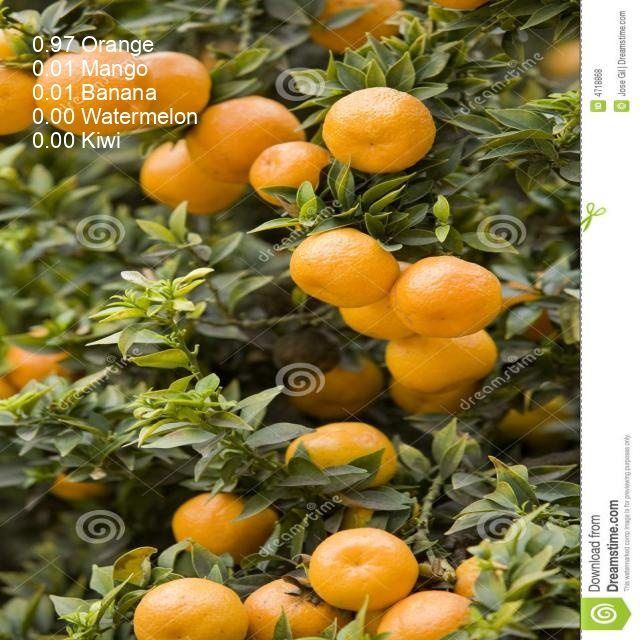

In [24]:
import os
import random
import glob
from IPython.display import Image, display

# 1. Ensure we are in yolov5 directory for the predict script
%cd /content/yolov5

# 2. Define standard paths
TEST_DIR = '/content/drive/MyDrive/Fruits-YOLO/Fruits-by-YOLO/Fruits-by-YOLO/test'
# ⚠️ EXACT PATH from your log above
SAVED_WEIGHTS = '/content/drive/MyDrive/Fruits-YOLO/training_results/yolov5s_fruits_cls_20251107_1353/weights/best.pt'

# 3. Pick a random test image
test_images = glob.glob(os.path.join(TEST_DIR, '*', '*.jpg')) + \
              glob.glob(os.path.join(TEST_DIR, '*', '*.jpeg')) + \
              glob.glob(os.path.join(TEST_DIR, '*', '*.png'))

if test_images and os.path.exists(SAVED_WEIGHTS):
    random_image = random.choice(test_images)
    print(f"🧪 Testing image: {os.path.basename(random_image)}")
    print(f"💾 Using weights from Drive: {os.path.basename(os.path.dirname(SAVED_WEIGHTS))}/best.pt")

    # 4. Run prediction
    !python classify/predict.py \
      --weights "{SAVED_WEIGHTS}" \
      --source "{random_image}" \
      --img 224

    # 5. Display Result
    predict_dirs = glob.glob('runs/predict-cls/*')
    if predict_dirs:
        latest_run = max(predict_dirs, key=os.path.getmtime)
        result_image = os.path.join(latest_run, os.path.basename(random_image))
        print("\n🖼️ Prediction Result:")
        display(Image(filename=result_image))
else:
    if not test_images:
        print("❌ No test images found.")
    if not os.path.exists(SAVED_WEIGHTS):
        print(f"❌ Saved weights not found at: {SAVED_WEIGHTS}")